<a href="https://colab.research.google.com/github/GHSMoura/Premier-League-2025/blob/main/Premier%20League%202025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Premier League 2025: Estatísticas, Partidas, Salários
Jogos, salários, classificações, estatísticas e muito mais

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("flynn28/2025-premier-league-stats-matches-salaries")

print("Path to dataset files:", path)

100%|██████████| 57.8k/57.8k [00:00<00:00, 37.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/flynn28/2025-premier-league-stats-matches-salaries/versions/1


Listar diretórios disponiveis

In [2]:
import os

# Listar arquivos disponíveis no diretório do dataset
print(os.listdir(path))

['player_stats.csv', 'team_salary.csv', 'player_salaries.csv', 'team_stats.csv', 'player_possession_stats.csv', 'fixtures.csv', 'standings.csv', 'team_possession_stats.csv']


Carregar dados

In [3]:
import pandas as pd

# Definir os caminhos dos arquivos
player_stats_path = f"{path}/player_stats.csv"
team_salary_path = f"{path}/team_salary.csv"
standings_path = f"{path}/standings.csv"

# Carregar os datasets
player_stats_df = pd.read_csv(player_stats_path, encoding="ISO-8859-1")
team_salary_df = pd.read_csv(team_salary_path, encoding="ISO-8859-1")
standings_df = pd.read_csv(standings_path, encoding="ISO-8859-1")

# Exibir as primeiras linhas para inspeção
print(player_stats_df.head())
print(team_salary_df.head())
print(standings_df.head())

                name         nation position         team   age    born  \
0         Max Aarons        England       DF  Bournemouth  25.0  2000.0   
1  Joshua Acheampong        England       DF      Chelsea  19.0  2006.0   
2        Tyler Adams  United States       MF  Bournemouth  26.0  1999.0   
3   Tosin Adarabioyo        England       DF      Chelsea  27.0  1997.0   
4      Simon Adingra   Cote dIvoire    FW,MF     Brighton  23.0  2002.0   

   played  starts  minutes  goals  assists  penalty_kicks  \
0       3       1       86      0        0              0   
1       4       2      170      0        0              0   
2      27      20     1875      0        3              0   
3      21      14     1319      1        1              0   
4      28      11     1052      2        2              0   

   penalty_kick_attempts  yellow  red  expected_goals  progressive_carries  \
0                      0       0    0             0.0                    1   
1                      0  

Verificando a estrutura dos dados

In [5]:
# Informações gerais sobre cada dataset
print(player_stats_df.info())
print(team_salary_df.info())
print(standings_df.info())

# Verificar valores ausentes
print(player_stats_df.isnull().sum())
print(team_salary_df.isnull().sum())
print(standings_df.isnull().sum())

# Estatísticas gerais
print(player_stats_df.describe())
print(team_salary_df.describe())
print(standings_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         571 non-null    object 
 1   nation                       568 non-null    object 
 2   position                     571 non-null    object 
 3   team                         571 non-null    object 
 4   age                          568 non-null    float64
 5   born                         568 non-null    float64
 6   played                       571 non-null    int64  
 7   starts                       571 non-null    int64  
 8   minutes                      571 non-null    int64  
 9   goals                        571 non-null    int64  
 10  assists                      571 non-null    int64  
 11  penalty_kicks                571 non-null    int64  
 12  penalty_kick_attempts        571 non-null    int64  
 13  yellow              

Top 10 artilheiros e top 10 assstentes

In [6]:
# Top 10 artilheiros
top_goleadores = player_stats_df.sort_values(by="goals", ascending=False).head(10)
print("\n🔝 Top 10 Artilheiros da Premier League 2025")
print(top_goleadores[['name', 'team', 'goals']])

# Top 10 assistentes
top_assistentes = player_stats_df.sort_values(by="assists", ascending=False).head(10)
print("\n🎯 Top 10 Assistentes da Premier League 2025")
print(top_assistentes[['name', 'team', 'assists']])


🔝 Top 10 Artilheiros da Premier League 2025
                     name             team  goals
446         Mohamed Salah        Liverpool     28
250        Alexander Isak    Newcastle Utd     23
222        Erling Haaland  Manchester City     21
560            Chris Wood  Nott'ham Forest     20
559           Yoane Wissa        Brentford     19
337          Bryan Mbeumo        Brentford     19
544         Ollie Watkins      Aston Villa     16
114         Matheus Cunha           Wolves     15
404           Cole Palmer          Chelsea     15
333  Jean-Philippe Mateta   Crystal Palace     14

🎯 Top 10 Assistentes da Premier League 2025
                 name             team  assists
446     Mohamed Salah        Liverpool       18
370      Jacob Murphy    Newcastle Utd       12
159    Anthony Elanga  Nott'ham Forest       11
436  Antonee Robinson           Fulham       10
445       Bukayo Saka          Arsenal       10
441     Morgan Rogers      Aston Villa       10
117  Mikkel Damsgaard   

Times que mais gastam salários anuais

In [7]:
# Times que gastam mais em salários anuais
top_times_salarios = team_salary_df.sort_values(by="annual", ascending=False)
print("\n💰 Clubes com maior gasto salarial anual")
print(top_times_salarios[['team', 'annual']])


💰 Clubes com maior gasto salarial anual
               team     annual
0   Manchester City  270992872
1    Manchester Utd  242779887
2           Chelsea  231062958
3           Arsenal  227432965
4         Liverpool  172913278
5       Aston Villa  144361995
6         Tottenham  140697102
7     Newcastle Utd  138637776
8          West Ham  121116085
9           Everton   95880658
10   Crystal Palace   93716625
11           Fulham   91831819
12   Leicester City   87817887
13  Nott'ham Forest   85235009
14         Brighton   83175683
15      Southampton   75217626
16      Bournemouth   73437533
17           Wolves   71448017
18        Brentford   55671515
19     Ipswich Town   45933362


Gráfico de comparação

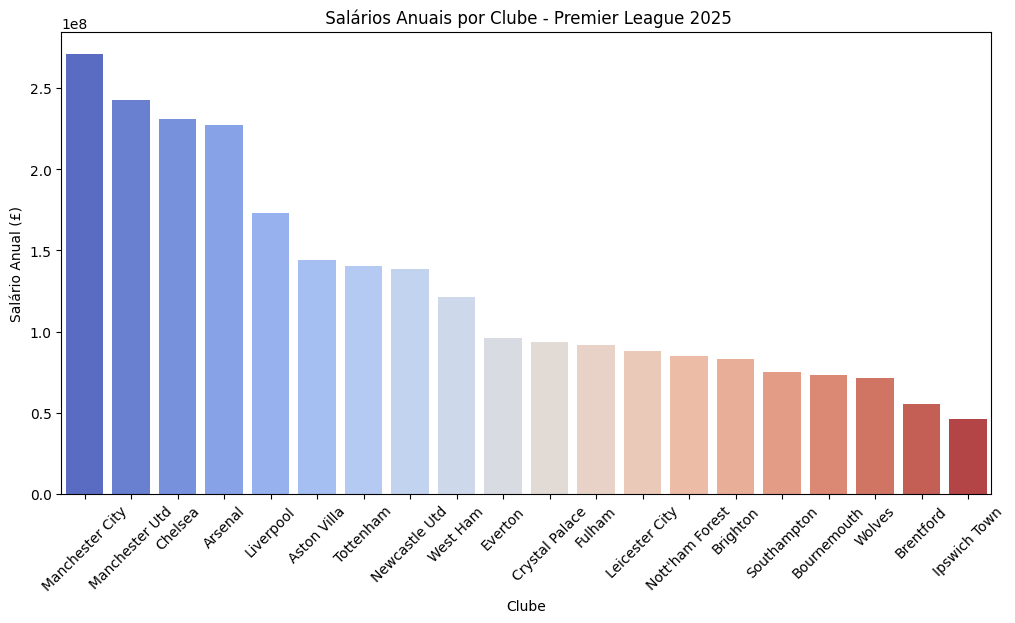

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="team", y="annual", data=top_times_salarios, hue="team", palette="coolwarm", legend=False)
plt.title(" Salários Anuais por Clube - Premier League 2025")
plt.xlabel("Clube")
plt.ylabel("Salário Anual (£)")
plt.xticks(rotation=45)
plt.show()

Classificação e desempenho dos times

In [11]:
# Melhor ataque e melhor defesa
melhor_ataque = standings_df.sort_values(by="goals", ascending=False).head(5)
melhor_defesa = standings_df.sort_values(by="conceded", ascending=True).head(5)

print("\n⚽ Times com melhor ataque")
print(melhor_ataque[['team', 'goals']])

print("\n🛡 Times com melhor defesa")
print(melhor_defesa[['team', 'conceded']])


⚽ Times com melhor ataque
              team  goals
0        Liverpool     85
2  Manchester City     70
3    Newcastle Utd     68
1          Arsenal     67
8        Brentford     65

🛡 Times com melhor defesa
               team  conceded
1           Arsenal        33
0         Liverpool        40
4           Chelsea        43
2   Manchester City        44
12          Everton        44


Gráfico melhor ataque

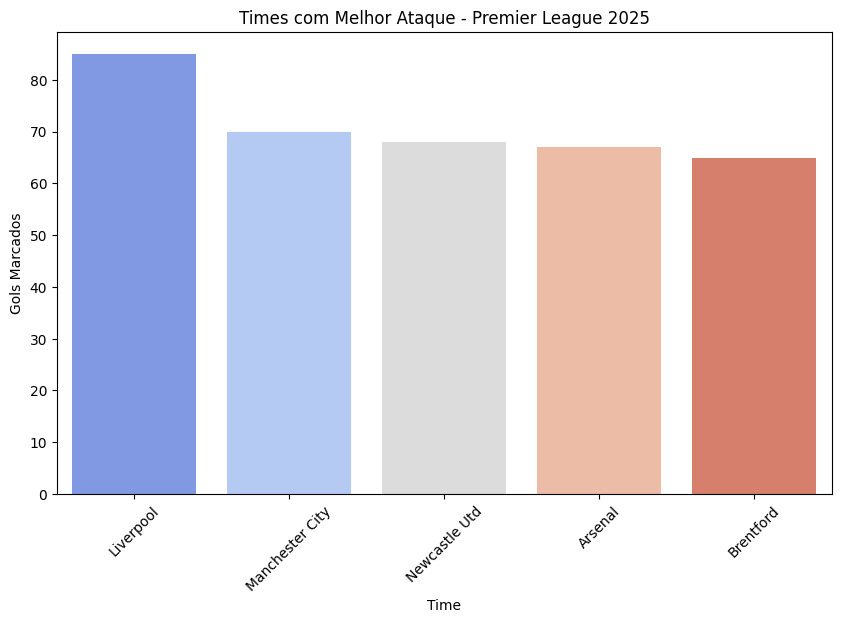

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="team", y="goals", data=melhor_ataque, hue="team", palette="coolwarm", legend=False)
plt.title("Times com Melhor Ataque - Premier League 2025")
plt.xlabel("Time")
plt.ylabel("Gols Marcados")
plt.xticks(rotation=45)
plt.show()

Melhor defesa

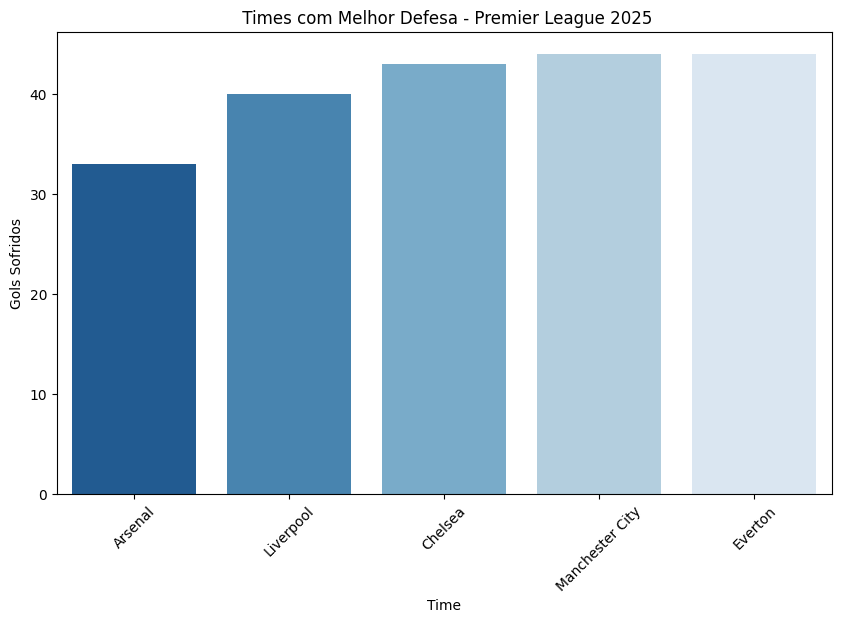

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x="team", y="conceded", data=melhor_defesa, hue="team", palette="Blues_r", legend=False)
plt.title(" Times com Melhor Defesa - Premier League 2025")
plt.xlabel("Time")
plt.ylabel("Gols Sofridos")
plt.xticks(rotation=45)
plt.show()



Após analisar os dados, conseguimos identificar **os jogadores, times e fatores financeiros** que moldaram a temporada. Vamos explorar os **principais destaques** com base nos números!

---

### **1️⃣ Artilheiros da Temporada**
Os **10 maiores goleadores** da Premier League mostraram como o poder ofensivo influencia na classificação das equipes:

✅ **Mohamed Salah (Liverpool)** foi novamente dominante, liderando com **28 gols**, reforçando seu papel essencial no ataque dos Reds.  
✅ **Alexander Isak (Newcastle)** e **Erling Haaland (Manchester City)** mantiveram uma ótima taxa de conversão, terminando com **23 e 21 gols**, respectivamente.  
✅ **Chris Wood (Nott'ham Forest)** surpreendeu ao figurar entre os **principais goleadores**, provando sua eficácia na finalização.  
✅ **Brentford teve dois jogadores no top 10**, **Yoane Wissa e Bryan Mbeumo**, mostrando que a equipe tem um sistema ofensivo bem distribuído.  

🔹 **Conclusão:** As equipes que possuem **finalizadores confiáveis** garantiram um bom desempenho na temporada.

---

### **2️⃣ Melhores Assistentes**
A **criação de jogadas** foi fundamental para muitos times, e os **10 melhores assistentes** da Premier League mostraram isso:

✅ **Mohamed Salah (Liverpool)** não apenas brilhou nos gols, mas também liderou **assistências (18)**, provando sua versatilidade ofensiva.  
✅ **Jacob Murphy (Newcastle)** e **Anthony Elanga (Nott'ham Forest)** também tiveram papéis cruciais na construção de jogadas.  
✅ **Mikkel Damsgaard (Brentford) e Morgan Rogers (Aston Villa)** mostraram grande capacidade de distribuição e visão de jogo.  

🔹 **Conclusão:** Os **melhores criadores de jogadas** foram essenciais para seus times, permitindo que os atacantes tivessem sucesso.

---

### **3️⃣ Clubes com Maior Gasto Salarial**
Os clubes da Premier League investem muito em seus elencos, e a distribuição salarial revela onde está a maior concentração de talento:

✅ **Manchester City liderou os gastos** com um orçamento astronômico de **£271 milhões anuais**, indicando um elenco recheado de estrelas.  
✅ **Manchester United, Chelsea e Arsenal** também tiveram altos investimentos, com salários **acima de £220 milhões**.  
✅ **Liverpool, Aston Villa e Tottenham** mantiveram gastos consideráveis, reforçando o equilíbrio financeiro necessário para um elenco competitivo.  
✅ **Ipswich Town teve o menor gasto anual**, com apenas **£45 milhões**, demonstrando um modelo econômico diferente das grandes potências.  

🔹 **Conclusão:** As equipes com **altos investimentos salariais** geralmente brigam pelo título ou por vagas europeias, mas a gestão inteligente do orçamento pode ser um diferencial.

---

### **4️⃣ Times com Melhor Ataque**
O ataque foi uma das chaves para o sucesso na temporada:

✅ **Liverpool marcou incríveis 85 gols**, tendo o ataque mais potente da liga.  
✅ **Manchester City e Newcastle também foram extremamente ofensivos**, marcando **70 e 68 gols**, respectivamente.  
✅ **Arsenal e Brentford completam o top 5**, mostrando que equipes com um sistema ofensivo bem estruturado podem se manter competitivas.  

🔹 **Conclusão:** O **volume ofensivo e a capacidade de finalização** foram essenciais para garantir bons desempenhos na tabela.

---

### **5️⃣ Times com Melhor Defesa**
Enquanto alguns times dominaram ofensivamente, outros se destacaram na **solidez defensiva**:

✅ **Arsenal teve a melhor defesa**, sofrendo apenas **33 gols**, mostrando um sistema eficiente na contenção adversária.  
✅ **Liverpool foi igualmente sólido na defesa**, sofrendo **40 gols**, complementando seu ataque arrasador.  
✅ **Chelsea e Manchester City também tiveram bons números defensivos**, reforçando sua consistência ao longo da temporada.  
✅ **Everton apareceu entre os times mais seguros defensivamente**, indicando uma estratégia mais voltada à proteção de sua meta.  

🔹 **Conclusão:** Uma **defesa bem organizada** é tão importante quanto um ataque potente para garantir um bom desempenho na Premier League.


### **🚀 Conclusão Final**
💡 **Mohamed Salah foi o grande nome da temporada**, liderando tanto **gols quanto assistências**, consolidando seu impacto.  
⚽ **Liverpool dominou ofensivamente**, enquanto **Arsenal foi a equipe mais sólida defensivamente**.  
💰 **Manchester City investiu pesado em seu elenco**, mas outras equipes como **Brentford e Newcastle** mostraram que podem competir sem precisar dos maiores orçamentos.  
🔥 **Times com equilíbrio entre ataque e defesa** foram os mais bem-sucedidos, indicando que a estratégia ideal envolve eficiência em ambos os setores.  

